In [ ]:
noaanum = 12673
obsdate = "20170906_000000"

# ISEE / Kusano
nc_file = f"/mnt/obsdata/isee_nlfff_v1.2/{noaanum}/{noaanum}_{obsdate}.nc"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

from tool.load_nlfff import nlfff

In [ ]:
data = nlfff(nc_file)

x (westward)  unit: Mm
y (northward)  unit: Mm
z (out ot photosphere)  unit: Mm
Bx (westward)  unit: G
By (northward)  unit: G
Bz (out of photosphere)  unit: G
Bx_pot (westward)  unit: G
By_pot (northward)  unit: G
Bz_pot (out of photosphere)  unit: G


In [ ]:
x = data.x
y = data.y
z = data.z

x.shape, y.shape, z.shape

((513,), (257,), (257,))

In [ ]:
dx = np.diff(x)[0]
dy = np.diff(y)[0]
dz = np.diff(z)[0]

In [ ]:
Bx = data.bx
By = data.by
Bz = data.bz

B = np.stack([Bx, By, Bz], axis=-1)
B.shape

(513, 257, 257, 3)

<matplotlib.image.AxesImage>

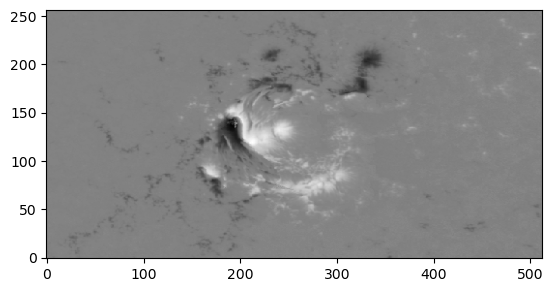

In [ ]:
plt.imshow(B[:, :, 0, 2].T, origin="lower", cmap="gray")

$$
\vec{B} = B_x\hat{x} + B_y\hat{y} + B_z\hat{z}
$$
```
B.shape = (nx, ny, nz, 3)

Bx = B[:, :, :, 0]
By = B[:, :, :, 1]
Bz = B[:, :, :, 2]
```

$$
|\vec{B}| = \sqrt{B_x^2 + B_y^2 + B_z^2}
$$

```
b_norm.shape = (nx, ny, nz)
```

In [ ]:
bb_norm = np.sqrt((B**2).sum(-1))
bb_norm.shape

(513, 257, 257)

<matplotlib.image.AxesImage>

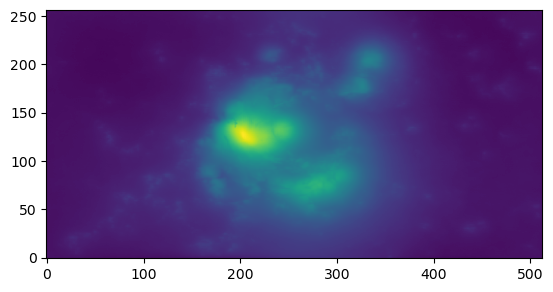

In [ ]:
plt.imshow(bb_norm.sum(-1).T, origin="lower")

In [ ]:
b_norm = np.linalg.norm(B, axis=-1)
b_norm.shape

(513, 257, 257)

<matplotlib.image.AxesImage>

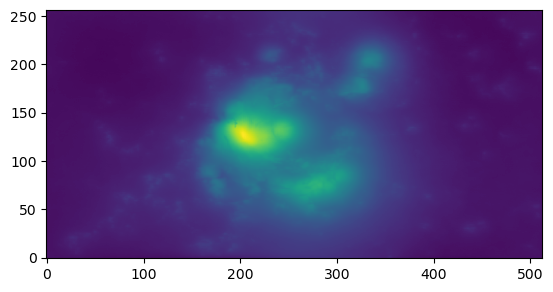

In [ ]:
plt.imshow(b_norm.sum(-1).T, origin="lower")

In [ ]:
np.allclose(bb_norm, b_norm)

True

$$
f'(x) \approx \frac{f(x+h) - f(x-h)}{2h}
$$

$$
f''(x) \approx \frac{f(x+h) - 2f(x) + f(x-h)}{h^2}
$$

$$
\nabla \times \mathbf{F} =
\left(\frac{\partial F_z}{\partial y} - \frac{\partial F_y}{\partial z}\right) \boldsymbol{\hat x} + \left(\frac{\partial F_x}{\partial z} - \frac{\partial F_z}{\partial x} \right) \boldsymbol{\hat y} + \left(\frac{\partial F_y}{\partial x} - \frac{\partial F_x}{\partial y} \right) \boldsymbol{\hat z}
$$

$$
\nabla\cdot\mathbf{F} = \frac{\partial F_x}{\partial x}+\frac{\partial F_y}{\partial y}+\frac{\partial F_z}{\partial z}.
$$

$$
\nabla^2 \mathbf{F} = (\nabla^2 F_x, \nabla^2 F_y, \nabla^2 F_z)
$$

$$
\nabla^2 f = \frac{\partial^2 f}{\partial x^2} + \frac{\partial^2 f}{\partial y^2} + \frac{\partial^2 f}{\partial z^2}
$$

In [ ]:
f = np.array([1, 2, 4, 7, 11, 16])
np.gradient(f, edge_order=2)

array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5])

In [ ]:
f = np.array([1, 2, 4, 7, 11, 16])
np.gradient(f, edge_order=1) * 2

array([ 2.,  3.,  5.,  7.,  9., 10.])

In [ ]:
np.array([4, 7, 11, 16]) - np.array([1, 2, 4, 7])

array([3, 5, 7, 9])

In [ ]:
f[2:] - f[:-2]

array([3, 5, 7, 9])

In [ ]:
k = np.zeros_like(f, dtype=float)
k[1:-1] = (f[2:] - f[:-2]) / 2
k

array([0. , 1.5, 2.5, 3.5, 4.5, 0. ])

In [ ]:
B = np.array(B)
Bx = B[..., 0]
By = B[..., 1]
Bz = B[..., 2]

In [ ]:
Bx_dx = np.zeros_like(Bx)
Bx_dx[1:-1, :, :] = (Bx[2:, :, :] - Bx[:-2, :, :]) / (2 * dx)
Bx_dx.shape

(513, 257, 257)

<matplotlib.colorbar.Colorbar>

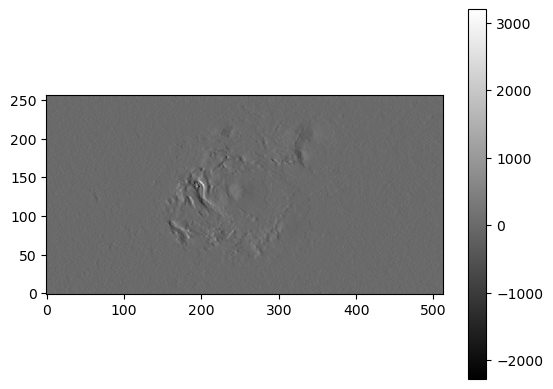

In [ ]:
plt.imshow(Bx_dx[:, :, 0].T, origin="lower", cmap="gray")
plt.colorbar()

In [ ]:
dBx_dx, dBx_dy, dBx_dz = np.gradient(Bx, dx, dy, dz, axis=[0, 1, 2], edge_order=2)
dBy_dx, dBy_dy, dBy_dz = np.gradient(By, dx, dy, dz, axis=[0, 1, 2], edge_order=2)
dBz_dx, dBz_dy, dBz_dz = np.gradient(Bz, dx, dy, dz, axis=[0, 1, 2], edge_order=2)

<matplotlib.colorbar.Colorbar>

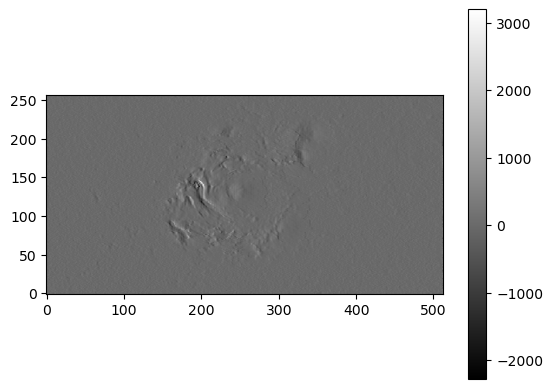

In [ ]:
plt.imshow(dBx_dx[:, :, 0].T, origin="lower", cmap="gray")
plt.colorbar()

In [ ]:
J = np.stack([dBz_dy - dBy_dz, dBx_dz - dBz_dx, dBy_dx - dBx_dy], axis=-1)
J.shape

(513, 257, 257, 3)

In [ ]:
j_norm = np.linalg.norm(J, axis=-1)
j_norm.shape

(513, 257, 257)

<matplotlib.colorbar.Colorbar>

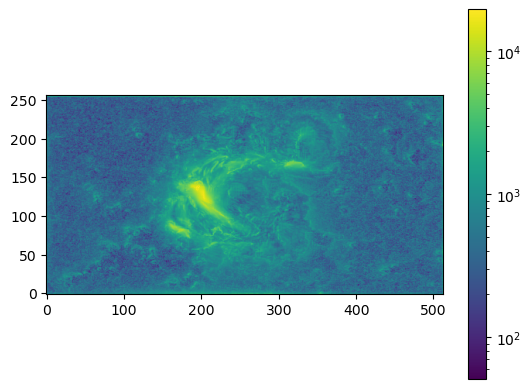

In [ ]:
plt.imshow(j_norm.sum(-1).T, origin="lower", norm=LogNorm())
plt.colorbar()

In [ ]:
np.max(np.abs(j_norm))

8854.985382800276

In [ ]:
np.mean(np.abs(j_norm))

2.8324672347999744

In [ ]:
div_B = dBx_dx + dBy_dy + dBz_dz
div_B.shape

(513, 257, 257)

In [ ]:
np.max(np.abs(div_B))

6313.548195051551

In [ ]:
np.mean(np.abs(div_B))

0.4881240490240531

<matplotlib.colorbar.Colorbar>

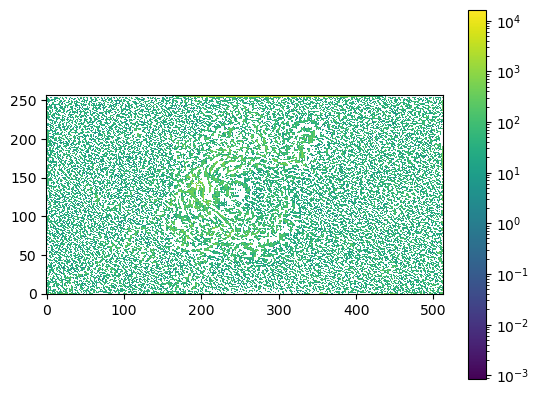

In [ ]:
plt.imshow(div_B.sum(-1).T, origin="lower", norm=LogNorm())
plt.colorbar()

In [ ]:
J.shape, B.shape

((513, 257, 257, 3), (513, 257, 257, 3))

In [ ]:
JxB = np.cross(J, B, axis=-1)
JxB.shape

(513, 257, 257, 3)

In [ ]:
jxb_norm = np.linalg.norm(JxB, axis=-1)
jxb_norm.shape

(513, 257, 257)

<matplotlib.colorbar.Colorbar>

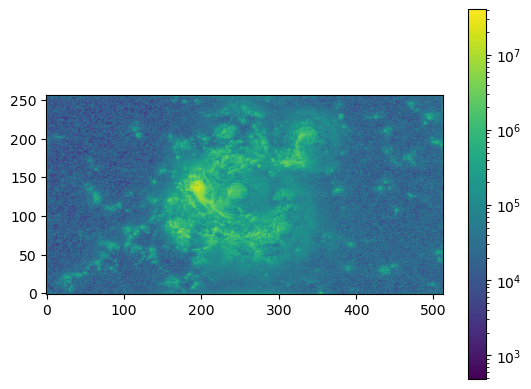

In [ ]:
plt.imshow(jxb_norm.sum(-1).T, origin="lower", norm=LogNorm())
plt.colorbar()

In [ ]:
np.max(np.abs(jxb_norm))

31892049.93048084

In [ ]:
np.mean(np.abs(jxb_norm))

603.1695862555601

In [ ]:
dBx_dx2 = np.gradient(dBx_dx, dx, axis=[0], edge_order=2)
dBx_dy2 = np.gradient(dBx_dy, dy, axis=[1], edge_order=2)
dBx_dz2 = np.gradient(dBx_dz, dz, axis=[2], edge_order=2)

dBy_dx2 = np.gradient(dBy_dx, dx, axis=[0], edge_order=2)
dBy_dy2 = np.gradient(dBy_dy, dy, axis=[1], edge_order=2)
dBy_dz2 = np.gradient(dBy_dz, dz, axis=[2], edge_order=2)

dBz_dx2 = np.gradient(dBz_dx, dx, axis=[0], edge_order=2)
dBz_dy2 = np.gradient(dBz_dy, dy, axis=[1], edge_order=2)
dBz_dz2 = np.gradient(dBz_dz, dz, axis=[2], edge_order=2)

In [ ]:
laplacian_B = np.stack(
    [
        dBx_dx2 + dBx_dy2 + dBx_dz2,
        dBy_dx2 + dBy_dy2 + dBy_dz2,
        dBz_dx2 + dBz_dy2 + dBz_dz2,
    ],
    axis=-1,
)
laplacian_B.shape

(513, 257, 257, 3)

In [ ]:
laplacian_B_norm = np.linalg.norm(laplacian_B, axis=-1)
laplacian_B_norm.shape

(513, 257, 257)

<matplotlib.colorbar.Colorbar>

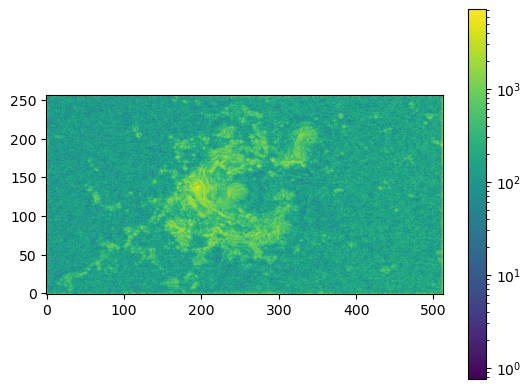

In [ ]:
plt.imshow(laplacian_B_norm[:, :, 0].T, origin="lower", norm=LogNorm())
plt.colorbar()
# plt.scatter(196, 138, s=5, c='red', marker='o')

In [ ]:
dBx_dx, dBx_dy, dBx_dz = np.gradient(Bx, axis=[0, 1, 2], edge_order=2)
dBy_dx, dBy_dy, dBy_dz = np.gradient(By, axis=[0, 1, 2], edge_order=2)
dBz_dx, dBz_dy, dBz_dz = np.gradient(Bz, axis=[0, 1, 2], edge_order=2)

In [ ]:
dBx_dx2 = np.gradient(dBx_dx, axis=[0], edge_order=2)
dBx_dy2 = np.gradient(dBx_dy, axis=[1], edge_order=2)
dBx_dz2 = np.gradient(dBx_dz, axis=[2], edge_order=2)

dBy_dx2 = np.gradient(dBy_dx, axis=[0], edge_order=2)
dBy_dy2 = np.gradient(dBy_dy, axis=[1], edge_order=2)
dBy_dz2 = np.gradient(dBy_dz, axis=[2], edge_order=2)

dBz_dx2 = np.gradient(dBz_dx, axis=[0], edge_order=2)
dBz_dy2 = np.gradient(dBz_dy, axis=[1], edge_order=2)
dBz_dz2 = np.gradient(dBz_dz, axis=[2], edge_order=2)

<matplotlib.colorbar.Colorbar>

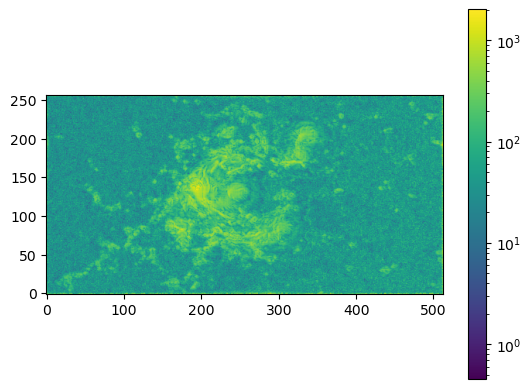

In [ ]:
laplacian_B = np.stack(
    [
        dBx_dx2 + dBx_dy2 + dBx_dz2,
        dBy_dx2 + dBy_dy2 + dBy_dz2,
        dBz_dx2 + dBz_dy2 + dBz_dz2,
    ],
    axis=-1,
)
laplacian_B_norm = np.linalg.norm(laplacian_B, axis=-1)
plt.imshow(laplacian_B_norm[:, :, 0].T, origin="lower", norm=LogNorm())
plt.colorbar()

In [ ]:
from scipy import ndimage

In [ ]:
result = ndimage.laplace(B)

In [ ]:
result.shape

(513, 257, 257, 3)

In [ ]:
result_norm = np.linalg.norm(result, axis=-1)
result_norm.shape

(513, 257, 257)

<matplotlib.colorbar.Colorbar>

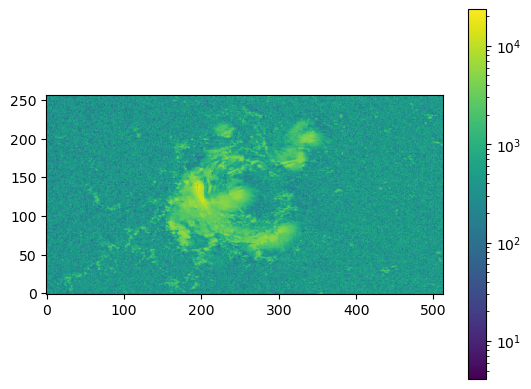

In [ ]:
plt.imshow(result_norm[:, :, 0].T, origin="lower", norm=LogNorm())
plt.colorbar()

[<matplotlib.lines.Line2D>]

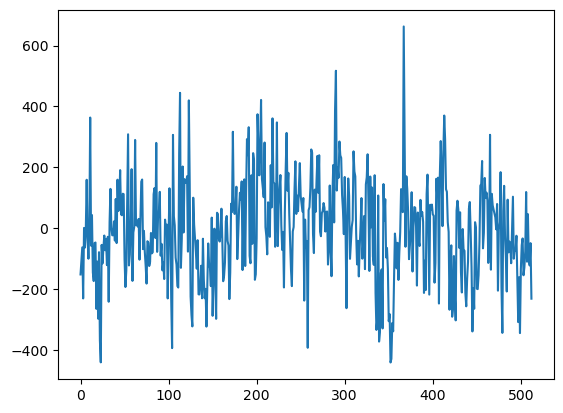

In [ ]:
plt.plot(laplacian_B[:, 0, 0, 0])

[<matplotlib.lines.Line2D>]

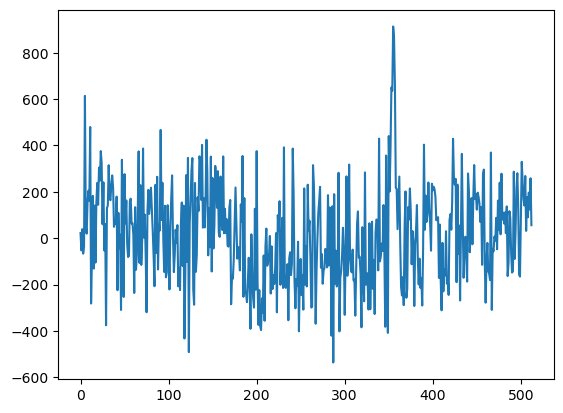

In [ ]:
plt.plot(result[:, 0, 0, 0])

In [ ]:
Bx_dx2 = np.zeros_like(Bx)
Bx_dy2 = np.zeros_like(Bx)
Bx_dz2 = np.zeros_like(Bx)

Bx_dx2[1:-1, :, :] = (Bx[2:, :, :] - 2 * Bx[1:-1, :, :] + Bx[:-2, :, :]) / (dx**2)
Bx_dy2[:, 1:-1, :] = (Bx[:, 2:, :] - 2 * Bx[:, 1:-1, :] + Bx[:, :-2, :]) / (dy**2)
Bx_dz2[:, :, 1:-1] = (Bx[:, :, 2:] - 2 * Bx[:, :, 1:-1] + Bx[:, :, :-2]) / (dz**2)

By_dx2 = np.zeros_like(By)
By_dy2 = np.zeros_like(By)
By_dz2 = np.zeros_like(By)

By_dx2[1:-1, :, :] = (By[2:, :, :] - 2 * By[1:-1, :, :] + By[:-2, :, :]) / (dx**2)
By_dy2[:, 1:-1, :] = (By[:, 2:, :] - 2 * By[:, 1:-1, :] + By[:, :-2, :]) / (dy**2)
By_dz2[:, :, 1:-1] = (By[:, :, 2:] - 2 * By[:, :, 1:-1] + By[:, :, :-2]) / (dz**2)

Bz_dx2 = np.zeros_like(Bz)
Bz_dy2 = np.zeros_like(Bz)
Bz_dz2 = np.zeros_like(Bz)

Bz_dx2[1:-1, :, :] = (Bz[2:, :, :] - 2 * Bz[1:-1, :, :] + Bz[:-2, :, :]) / (dx**2)
Bz_dy2[:, 1:-1, :] = (Bz[:, 2:, :] - 2 * Bz[:, 1:-1, :] + Bz[:, :-2, :]) / (dy**2)
Bz_dz2[:, :, 1:-1] = (Bz[:, :, 2:] - 2 * Bz[:, :, 1:-1] + Bz[:, :, :-2]) / (dz**2)

[<matplotlib.lines.Line2D>]

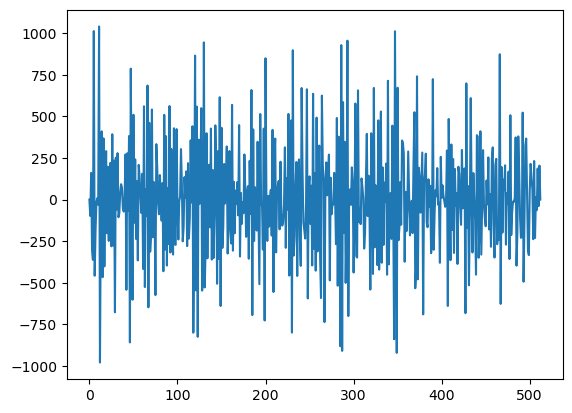

In [ ]:
plt.plot(Bx_dx2[:, 0, 0])

In [ ]:
aBx_dx2 = np.zeros_like(Bx_dx)

aBx_dx2[1:-1, :, :] = (Bx_dx[2:, :, :] - 2 * Bx_dx[1:-1, :, :] + Bx_dx[:-2, :, :]) / (
    2 * dx
)

[<matplotlib.lines.Line2D>]

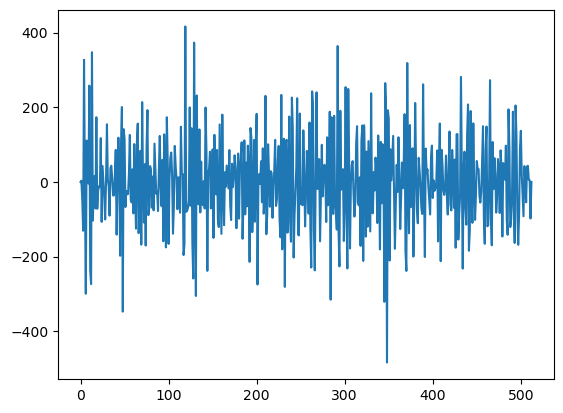

In [ ]:
plt.plot(aBx_dx2[:, 0, 0])

[<matplotlib.lines.Line2D>]

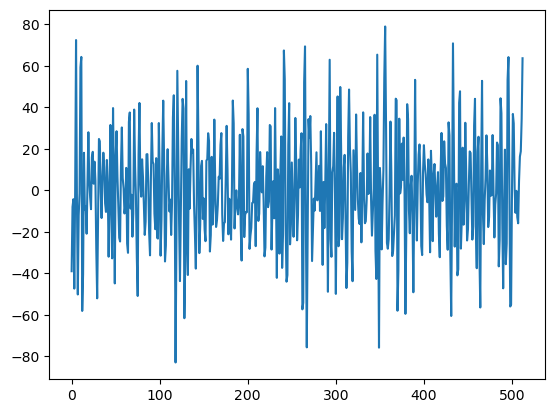

In [ ]:
plt.plot(dBx_dx2[:, 0, 0])

In [ ]:
laplace_B = np.stack(
    [Bx_dx2 + Bx_dy2 + Bx_dz2, By_dx2 + By_dy2 + By_dz2, Bz_dx2 + Bz_dy2 + Bz_dz2],
    axis=-1,
)
laplace_B.shape

(513, 257, 257, 3)

In [ ]:
laplace_B_norm = np.linalg.norm(laplace_B, axis=-1)
laplace_B_norm.shape

(513, 257, 257)

<matplotlib.colorbar.Colorbar>

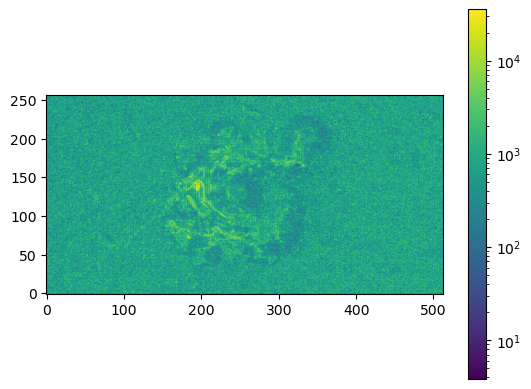

In [ ]:
plt.imshow(laplace_B_norm[:, :, 0].T, origin="lower", norm=LogNorm())
plt.colorbar()
# plt.scatter(196, 138, s=5, c='red', marker='o')

In [ ]:
np.unravel_index(np.argmax(np.abs(laplacian_B_norm), axis=None), laplacian_B_norm.shape)

(197, 139, 1)

In [ ]:
np.unravel_index(np.argmax(np.abs(laplace_B_norm), axis=None), laplace_B_norm.shape)

(195, 137, 0)

In [ ]:
np.unravel_index(
    np.argmax(np.abs(laplacian_B_norm)[:, :, 5:], axis=None),
    laplacian_B_norm[:, :, 5:].shape,
)

(259, 256, 0)

In [ ]:
np.unravel_index(
    np.argmax(np.abs(laplace_B_norm)[:, :, 5:], axis=None),
    laplace_B_norm[:, :, 5:].shape,
)

(192, 138, 0)

Text(0, 0.5, 'y')

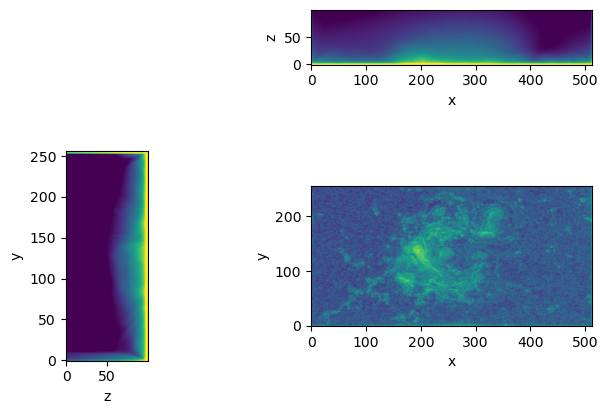

In [ ]:
fig = plt.figure(layout="constrained")
axd = fig.subplot_mosaic(
    """
    .A
    BC
    """
)

vmin = np.min(laplacian_B_norm.sum(-1))
vmax = np.max(laplacian_B_norm.sum(-1))

axd["C"].imshow(
    laplacian_B_norm.sum(-1).T, origin="lower", norm=LogNorm(vmin=vmin, vmax=vmax)
)
axd["C"].set_xlabel("x")
axd["C"].set_ylabel("y")

axd["A"].imshow(
    laplacian_B_norm.sum(1)[:, :100].T,
    origin="lower",
    norm=LogNorm(vmin=vmin, vmax=vmax),
)
axd["A"].set_xlabel("x")
axd["A"].set_ylabel("z")

axd["B"].imshow(
    np.rot90(laplacian_B_norm.sum(0)[:, :100]).T,
    origin="lower",
    norm=LogNorm(vmin=vmin, vmax=vmax),
)
axd["B"].set_xlabel("z")
axd["B"].set_ylabel("y")